In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_0'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

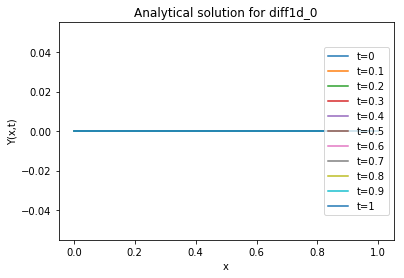

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 207
         Function evaluations: 231
         Gradient evaluations: 231
37.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 2.1267081963727926e-09
 hess_inv: array([[ 2628.9494071 ,   335.11248404, -2845.28246893, ...,
         3269.08196695,   -47.93184822,  1079.60634851],
       [  335.11245544,   116.25459602,  -502.93883421, ...,
          798.27684943,   290.09160853,   307.24095825],
       [-2845.28220676,  -502.93883734,  6298.9541158 , ...,
        -6255.72326397,   194.02494295, -2236.35299556],
       ...,
       [ 3269.08167272,   798.27685165, -6255.72325593, ...,
         7403.29772715,  1014.40312469,  2729.39282853],
       [  -47.93192585,   290.09159587,   194.025064  , ...,
         1014.40299166,  1420.49291708,   507.97081792],
       [ 1079.6062282 ,   307.24095585, -2236.35295983, ...,
         2729.39279308,   507.97086382,  1032.8849331

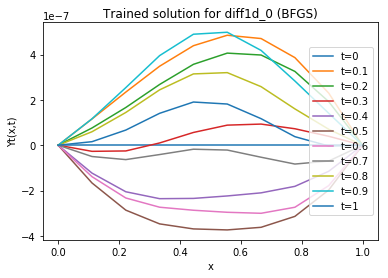

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

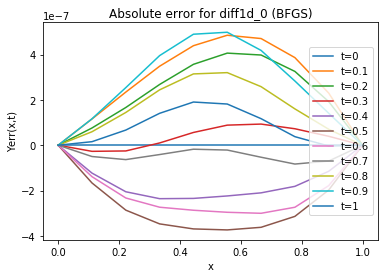

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 114
         Function evaluations: 127
         Gradient evaluations: 127
20.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.642384354321416e-08
 hess_inv: array([[ 1096.86723096,  1232.49063262,   350.42358732, ...,
           98.51305507,  -289.54454254,  -557.41086595],
       [ 1232.49063262,  1878.57048289,   403.33212151, ...,
          147.4066138 ,  -270.17280013,  -861.65021293],
       [  350.42358732,   403.33212152,   718.57243274, ...,
          170.30653846, -1049.2966165 ,  -281.42613652],
       ...,
       [   98.51305507,   147.4066138 ,   170.30653846, ...,
           47.40371539,  -260.49695616,   -96.49560671],
       [ -289.54454254,  -270.17280014, -1049.2966165 , ...,
         -260.49695616,  1703.31095721,   310.23522206],
       [ -557.41086595,  -861.65021293,  -281.42613652, ...,
          -96.49560671,   310.23522205,   423.99363225

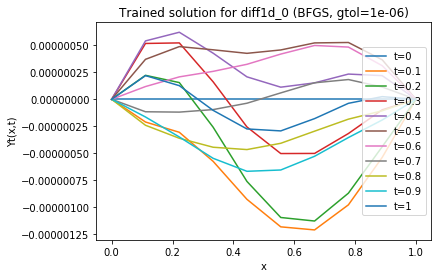

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

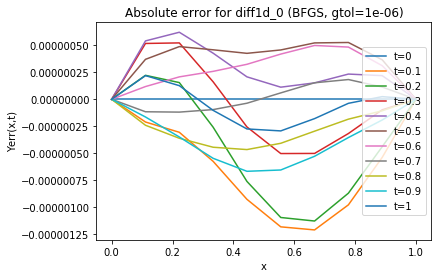

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 478
         Function evaluations: 537
         Gradient evaluations: 537
1min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.3451602845151483e-10
 hess_inv: array([[294125.22909807, 281986.05927696, 381476.09367129, ...,
        -20541.59379329, 165625.0204899 ,  31205.36285755],
       [281985.92097337, 399274.75029924, 358336.01217543, ...,
         -3697.21429306, 154912.96214086, 113817.21158883],
       [381476.08067027, 358336.15894863, 515391.88493567, ...,
        -40334.5006685 , 218401.23430782,  27885.38888634],
       ...,
       [-20541.63289171,  -3697.22977134, -40334.54941624, ...,
         18067.63134702,  -7390.91783872,  15486.77292426],
       [165624.99153131, 154913.01780388, 218401.20847398, ...,
         -7390.89708137, 101534.14142123,  16328.97104275],
       [ 31205.2694226 , 113817.14808654,  27885.28304463, ...,
         15486.764

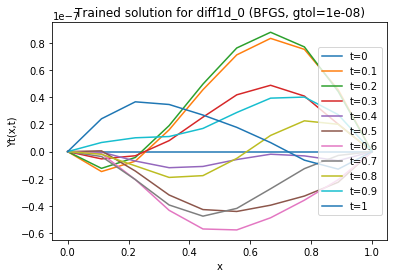

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

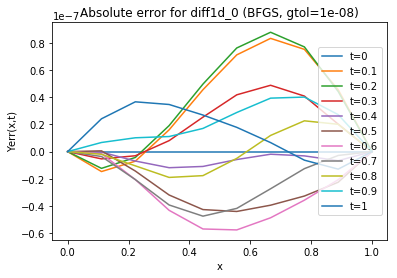

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-10)

In [15]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-10
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3121
         Function evaluations: 3461
         Gradient evaluations: 3461
9min 16s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.2815452549332777e-13
 hess_inv: array([[ 1.17702859e+08, -4.52730466e+07,  1.08153696e+08, ...,
         1.88708287e+07,  4.69695045e+07,  2.97545496e+07],
       [-4.52626886e+07,  1.32332298e+08, -4.61733729e+07, ...,
        -1.79901438e+07, -4.35565001e+06, -4.23018152e+07],
       [ 1.08150387e+08, -4.61791411e+07,  1.05732792e+08, ...,
         1.73003219e+07,  4.45695697e+07,  2.93246885e+07],
       ...,
       [ 1.88673091e+07, -1.79888471e+07,  1.72977517e+07, ...,
         4.92570354e+06,  4.14953692e+06,  7.62161798e+06],
       [ 4.69767896e+07, -4.36593703e+06,  4.45778737e+07, ...,
         4.15229242e+06,  2.57653783e+07,  8.53361935e+06],
       [ 2.97515889e+07, -4.23030143e+07,  2.93236636e+07, ...,
         7.6224

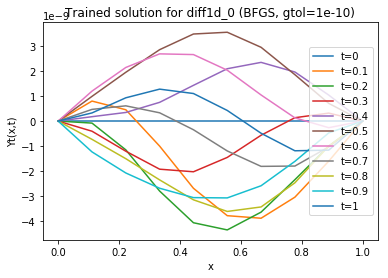

In [16]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

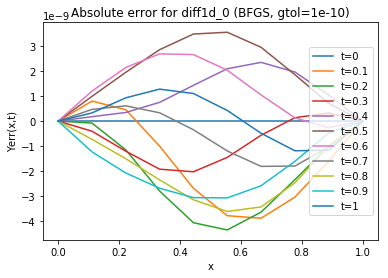

In [17]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));